## <center> Assignment 01
## <center> Course: ML1    
## <center> Instructor: Dr. Tariq Mahmood

### <center> Submitted By:
#### <center> Muhammad Uzair 29414
#### <center> Areeb Asif 14101

https://github.com/muhammaduzair99/ML-1.git

#### <center> 
#### <center> Hepatitis C Virus (HCV) for Egyptian patients
https://archive.ics.uci.edu/dataset/503/hepatitis+c+virus+hcv+for+egyptian+patientss

Egyptian patients who underwent treatment dosages for HCV about 18 months. Discretization should be applied based on expert recommendations; there is an attached file shows how.

| Variable Name                      | Role    | Type       | Demographic        | Description                                       | Units | Missing Values |
|------------------------------------|---------|------------|--------------------|---------------------------------------------------|-------|----------------|
| Age                                | Feature | Integer    |                    | Age of the individual                            |       | no             |
| Gender                             | Feature | Binary     | Gender             | [Male], [Female]                                 |       | no             |
| BMI                                | Feature | Integer    |                    | Body Mass Index (BMI)                            |       | no             |
| Fever                              | Feature | Binary     |                    | [Absent], [Present]                              |       | no             |
| Nausea/Vomting                     | Feature | Binary     |                    | [Absent], [Present]                              |       | no             |
| Headache                           | Feature | Binary     |                    | [Absent], [Present]                              |       | no             |
| Diarrhea                           | Feature | Binary     |                    | [Absent], [Present]                              |       | no             |
| Fatigue & generalized bone ache   | Feature | Binary     |                    | [Absent], [Present]                              |       | no             |
| Jaundice                           | Feature | Binary     |                    | [Absent], [Present]                              |       | no             |
| Epigastric pain                    | Feature | Binary     |                    | [Absent], [Present]                              |       | no             |
| WBC                                | Feature | Integer    | White blood cells  |                                                   |       | no             |
| RBC                                | Feature | Integer    | Red blood cells    |                                                   |       | no             |
| HGB                                | Feature | Integer    | Hemoglobin         |                                                   |       | no             |
| Plat                               | Feature | Integer    | Platelets          |                                                   |       | no             |
| AST 1                              | Feature | Integer    |                    | Aspartate transaminase ratio                    |       | no             |
| ALT 1                              | Feature | Integer    |                    | Alanine transaminase ratio 1 week               |       | no             |
| ALT4                               | Feature | Integer    |                    | Alanine transaminase ratio 4 weeks              |       | no             |
| ALT 12                             | Feature | Integer    |                    | Alanine transaminase ratio 12 weeks             |       | no             |
| ALT 24                             | Feature | Integer    |                    | Alanine transaminase ratio 24 weeks             |       | no             |
| ALT 36                             | Feature | Integer    |                    | Alanine transaminase ratio 36 weeks             |       | no             |
| ALT 48                             | Feature | Integer    |                    | Alanine transaminase ratio 48 weeks             |       | no             |
| ALT after 24 w                     | Feature | Integer    |                    | After 24 warnings alanine transaminase ratio 24 weeks|   | no             |
| RNA Base                           | Feature | Integer    |                    | RNA Base                                         |       | no             |
| RNA 4                              | Feature | Integer    |                    | RNA 4                                            |       | no             |
| RNA 12                             | Feature | Integer    |                    | RNA 12                                           |       | no             |
| RNA EOT                            | Feature | Integer    |                    | RNA end-of-treatment                             |       | no             |
| RNA EF                             | Feature | Integer    |                    | RNA Elongation Factor                            |       | no             |
| Baseline histological Grading      | Feature | Categorical|                    | Baseline histological Grading                    |       | no             |
| Baseline histological staging      | Target  | Categorical|                    | Baseline histological staging                    |       | no             |


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb


In [5]:
# file path
filepath = 'HCV-Egy-Data.csv'
target = 'Baselinehistological staging'

In [14]:
load_data(filepath).head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [44]:

def load_data(filepath):
    df = pd.read_csv(filepath)
    return df

def clean_data(df):
    df_cleaned = df.dropna()
    return df_cleaned

# def transform_data(df):
#     scaler = StandardScaler()
#     numerical_cols = df.select_dtypes(include=['float64']).columns
#     df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
#     return df

def transform_data(df):
    # Drop non-numeric columns
    numerical_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Check if there are any missing values
    if numerical_df.isnull().values.any():
        raise ValueError("Missing values found in numerical columns.")
    
    scaler = StandardScaler()
    numerical_cols = numerical_df.columns
    df[numerical_cols] = scaler.fit_transform(numerical_df)
    
    return df


def transform_data1(df):
    binary_categorical_cols = []
    for col in df.columns:
        if df[col].dtype == 'object' and df[col].nunique() == 2:
            binary_categorical_cols.append(col)

    for col in binary_categorical_cols:
        df[col] = df[col].map({'yes': True, 'no': False, 'Male': True, 'Female': False})
        
    return df

def eda(df):
    summary_stats = df.describe()
    float_cols = df.select_dtypes(include=['float64']).columns
    
    num_cols = len(float_cols)
    num_rows = (num_cols + 2) // 3
    
    plt.figure(figsize=(25, 25))
    for i, col in enumerate(float_cols):
        plt.subplot(num_rows, 3, i+1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(45, 45))
    for i, col in enumerate(float_cols):
        plt.subplot(num_rows, 3, i+1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


def manual_split(df, target_column):
    if isinstance(target_column, list):
        target_column = target_column[0]
    
    # One-hot encoding for categorical features
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    # Check if the target column is in the list of categorical columns
    if target_column in categorical_cols:
        # Remove the target column from the list of categorical columns
        categorical_cols.remove(target_column)
    else:
        print(f"Target column '{target_column}' is not found in the DataFrame's categorical columns.")
    
    # Perform one-hot encoding excluding the target column
    df = pd.get_dummies(df, columns=categorical_cols)

    # Label encoding for the target variable
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])

    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=[target_column]),
        df[target_column],
        test_size=0.2,
        random_state=42
    )
    return X_train, X_test, y_train, y_test
    

def model_selection():
    model = KNeighborsClassifier()
    return model
# def model_selection():
#     model = RandomForestClassifier()  # Initialize Random Forest Classifier
#     return model
# def model_selection():
#     model = SVC(kernel='linear')  # Using a linear kernel for simplicity
#     return model
# def model_selection():
#     model = xgb.XGBClassifier()
#     return model

    
def cv_scores(model,X_train, y_train):  
    # Example: KNN Classifier
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return cv_scores
    
def train_model(model,X_train,y_train):
    model.fit(X_train, y_train)

def evaluate_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    if len(np.unique(y_test)) > 2:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    if len(np.unique(y_test)) > 2:
        n_classes = len(np.unique(y_test))
        fpr = dict()
        tpr = dict()
        roc_auc_dict = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, model.predict_proba(X_test)[:, i])
            roc_auc_dict[i] = auc(fpr[i], tpr[i])

            plt.figure()
            plt.plot(fpr[i], tpr[i], color='darkorange', lw=2, label='ROC curve (class {})'.format(i))
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve - Class {}'.format(i))
            plt.legend(loc="lower right")
            plt.show()
    else:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

    print("\nEvaluation Metrics:")
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:")
    print(classification_rep)
    print("\nROC AUC Score:")
    print(roc_auc)

# def evaluate_model(model, X_test, y_test):
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     classification_rep = classification_report(y_test, y_pred)
#     print("\nEvaluation Metrics:")
#     print(f"Accuracy: {accuracy}")
#     print("\nClassification Report:")
#     print(classification_rep)



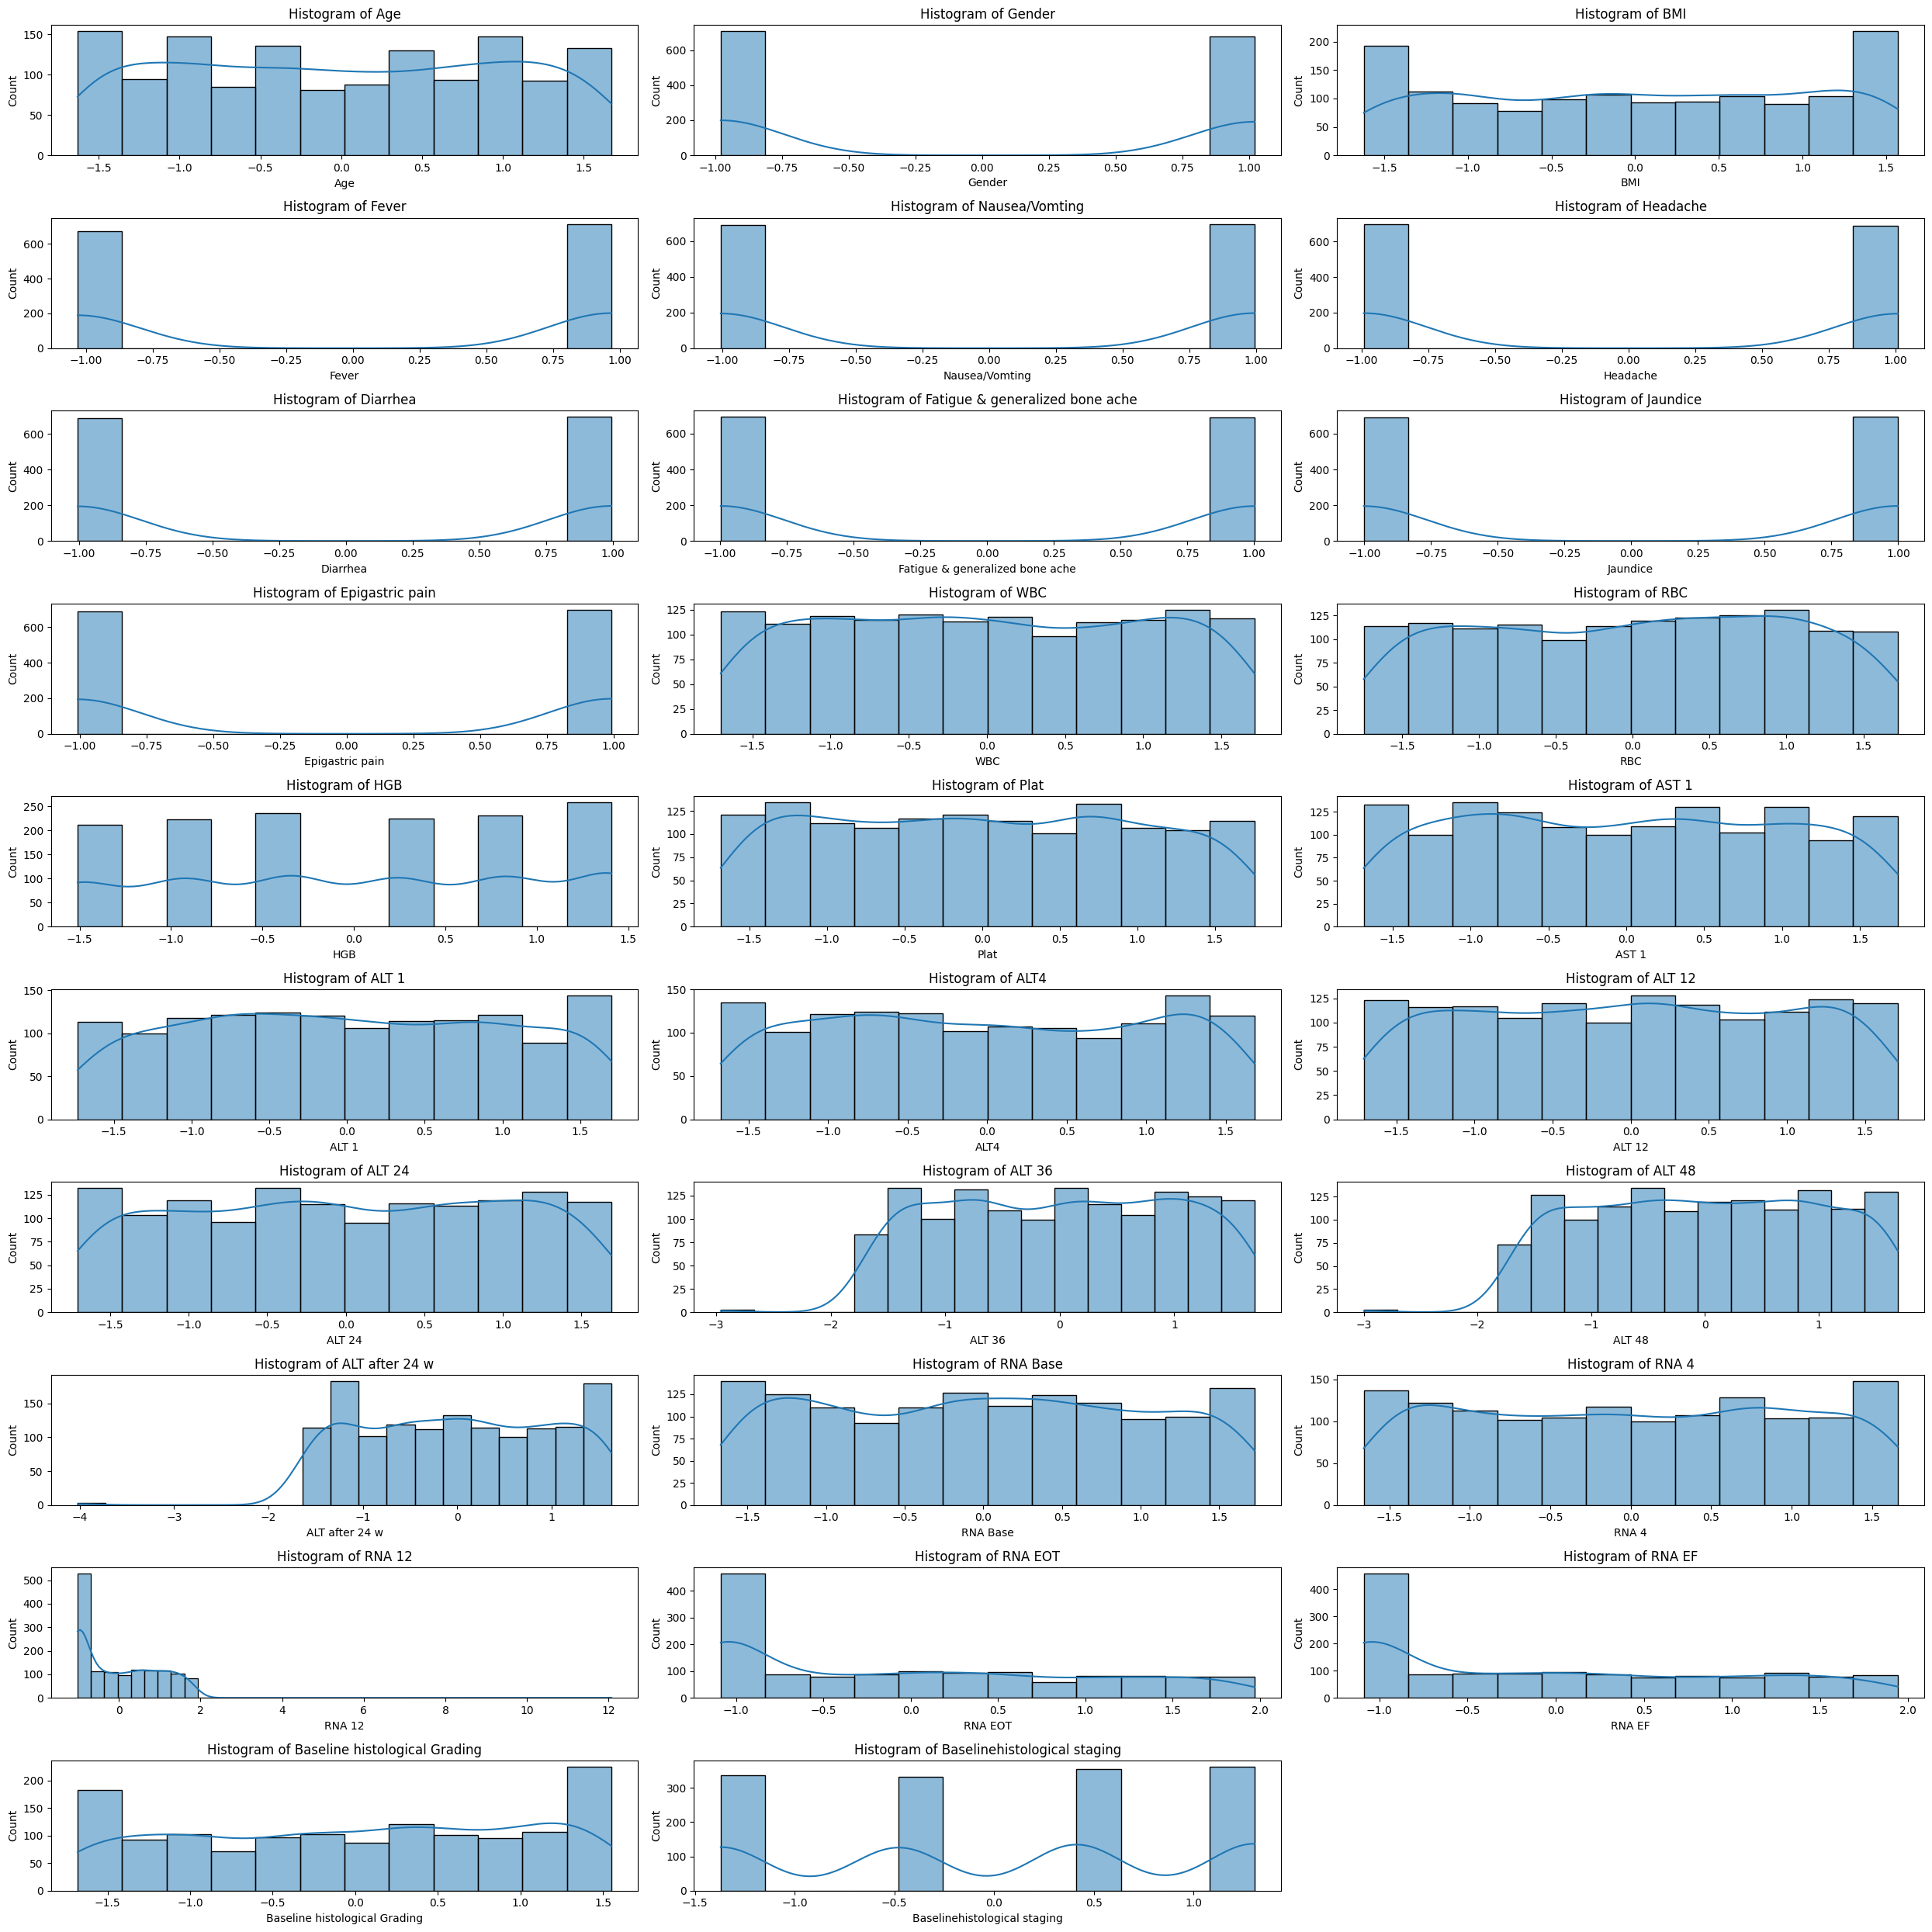

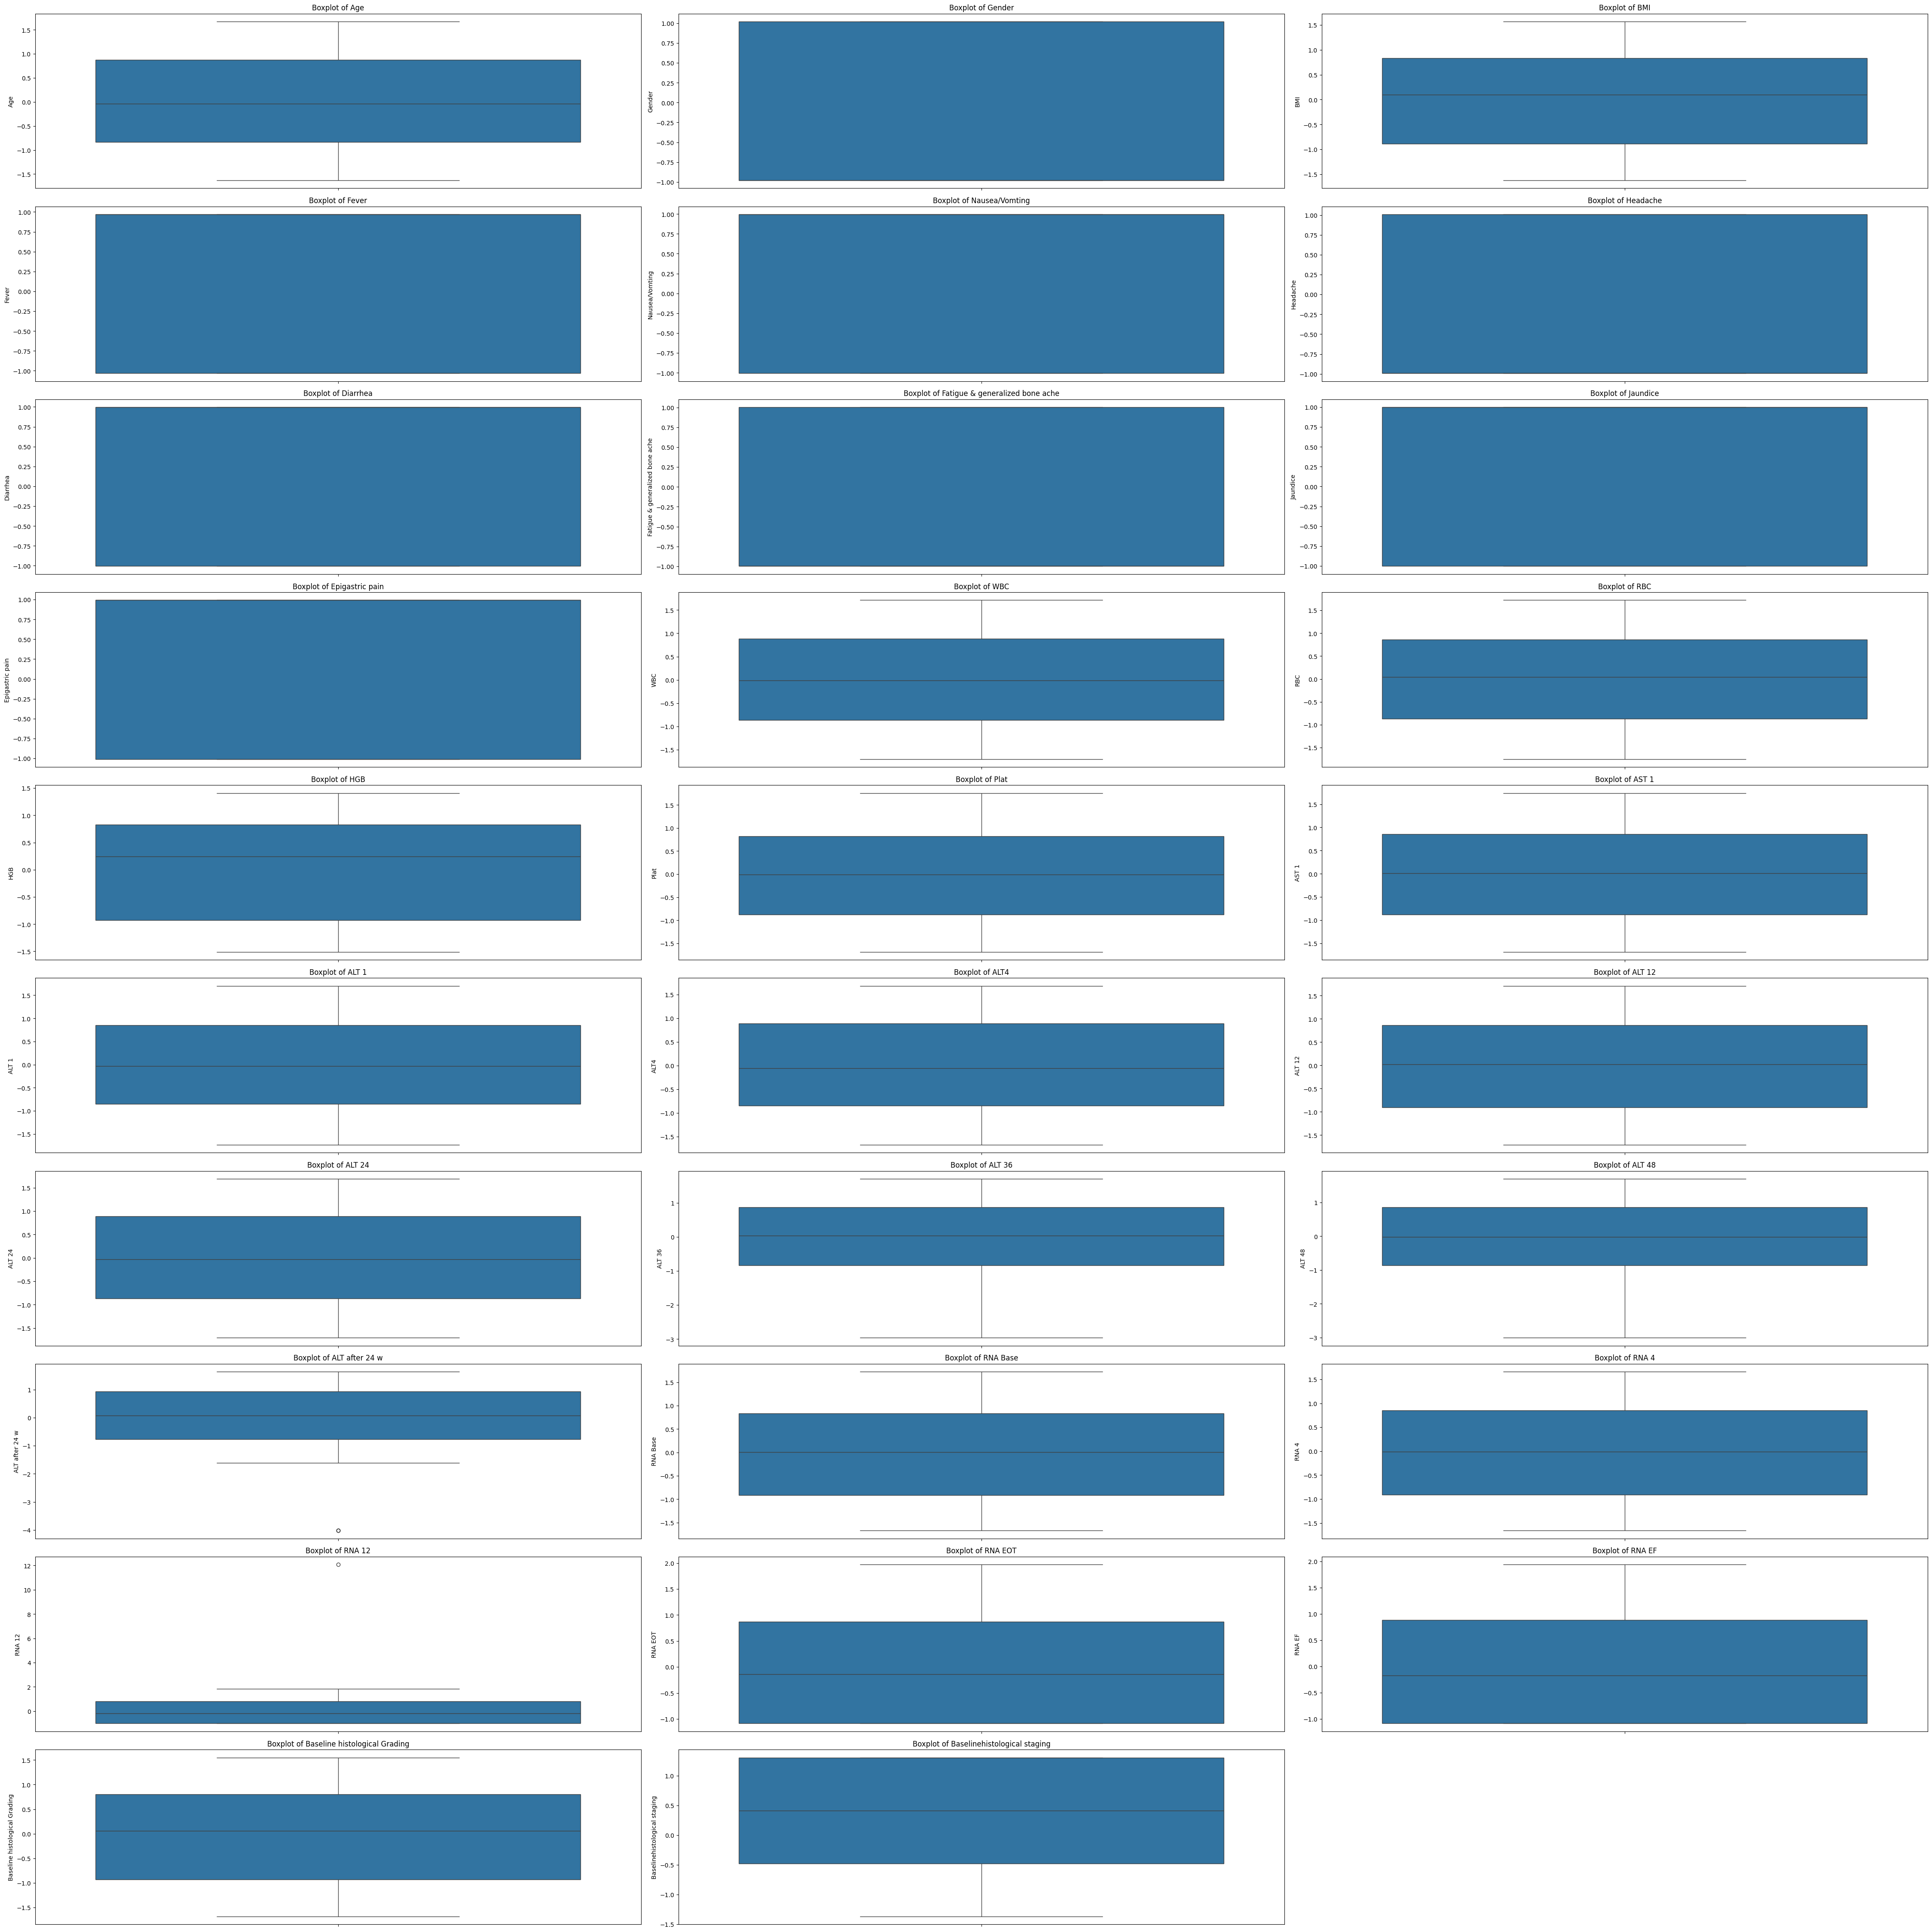

Target column 'Baselinehistological staging' is not found in the DataFrame's categorical columns.


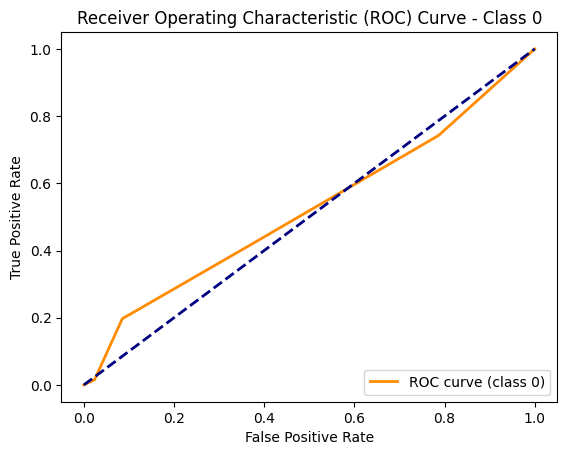

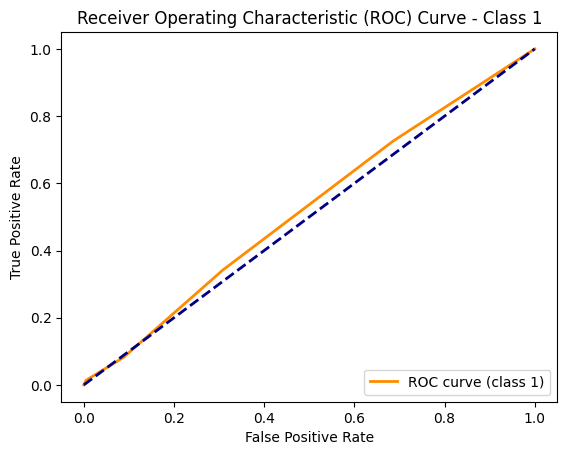

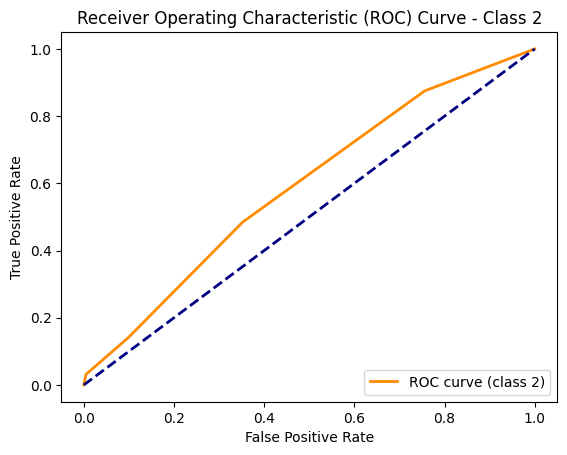

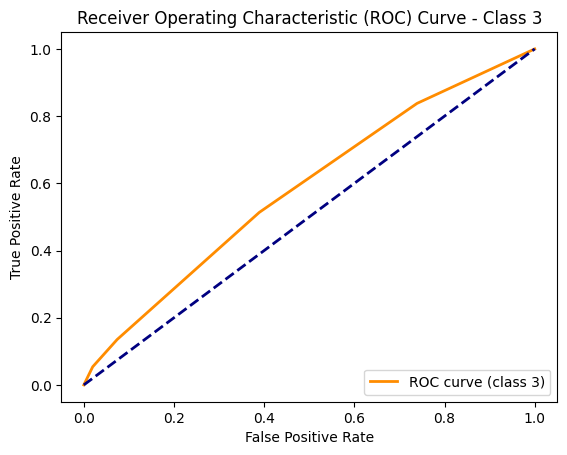


Evaluation Metrics:
Accuracy: 0.2888086642599278

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.41      0.33        66
           1       0.26      0.23      0.25        73
           2       0.28      0.30      0.29        64
           3       0.40      0.23      0.29        74

    accuracy                           0.29       277
   macro avg       0.30      0.29      0.29       277
weighted avg       0.30      0.29      0.29       277


ROC AUC Score:
0.554905558858541


In [46]:
def master_pipeline(filepath,target):
    df = load_data(filepath)
    df = clean_data(df)
    df = transform_data(df)
    df = transform_data1(df)
    eda(df)
    X_train, X_test, y_train, y_test = manual_split(df, target)
    model = model_selection()
    cv_scores(model,X_train, y_train)
    train_model(model, X_train, y_train)
    evaluate_model(model, X_test, y_test)

# Example usage:
master_pipeline(filepath,target)


The evaluation metrics provided include accuracy, classification report, and ROC AUC score. Let's interpret each of them:

Accuracy:

The accuracy of the model is approximately 28.88%. This means that the model correctly predicts the class labels for about 28.88% of the samples in the test dataset.
However, accuracy alone may not provide a complete picture, especially if the classes are imbalanced or if different types of errors have different consequences.
Classification Report:

Precision: Indicates the proportion of true positive predictions among all positive predictions.
Recall: Indicates the proportion of true positive predictions among all actual positive instances.
F1-score: Harmonic mean of precision and recall, providing a balance between the two metrics.
Support: Number of actual occurrences of each class in the test dataset.
The report provides these metrics for each class in the target variable.
ROC AUC Score:

The ROC AUC score (Receiver Operating Characteristic - Area Under the Curve) is a measure of how well the model can distinguish between classes.
It provides an aggregate measure of performance across all possible classification thresholds.
A score of 0.5 suggests random guessing, while a score of 1.0 indicates perfect separation of classes.
In this case, the ROC AUC score is approximately 0.555, indicating that the model performs slightly better than random guessing but is not highly accurate in distinguishing between classes.
Overall, the interpretation suggests that the model's performance is limited, with accuracy slightly better than random guessing and a modest ROC AUC score. Further analysis, model tuning, or consideration of different algorithms may be necessary to improve performance. Additionally, examining the distribution of classes and potential data quality issues could provide insights into potential improvements.